Corel Reef Foodweb
========

Questions:
    
- If I cluster things, the algorithms will always produce clusters. How do I check that those clusters are "good"?

In [1]:
import numpy as np
from numpy.linalg import solve, norm
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import rank
%matplotlib inline
np.random.seed(1)

#Set printing width of pandas
pd.set_option('max_columns', 150)

In [2]:
#Load data Cayman Island
#Matrix, rows are predators, columns are preys.

Meta_data = pd.read_excel('..\\data\\foodweb\\Coral reef\\857470.item.1.xlsx')

In [3]:
A = np.loadtxt('..\\data\\foodweb\\Coral reef\\857470.item.5.dat', dtype=float) #adjacency matrix

Significance test of ranks and Summary
--------

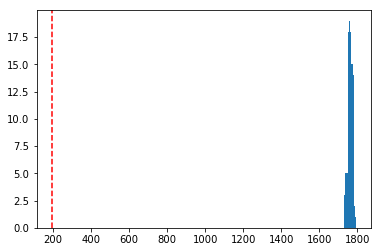

{'% Viol.': 0.0055762081784386614,
 'Data name': 'Coral reef',
 'Data type': 'Food web',
 'Depth': 3.1776110268642412,
 'Energy per edge': 0.051462379788702058,
 'Min. Viol.': 0,
 'N': 265,
 'Viol.': 21.0,
 'Weighted viol.': 0.79478660250743804,
 'p-value': 0.0}

In [4]:
rank.summary(A, data_name="Coral reef", data_type="Food web")

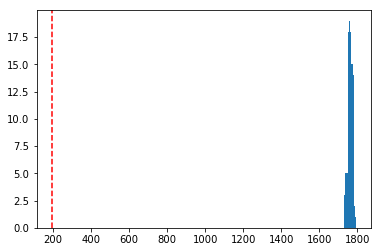

0.0

In [3]:
rank.test_ranks_significance(A, plot=True)

In [4]:
scores, correlation = rank.spring_rank(A)

Note: Nodes are ordered by scores (increasing) in orrelation matrix


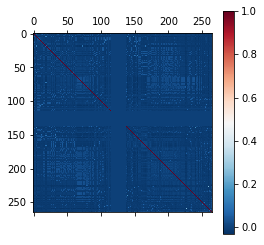

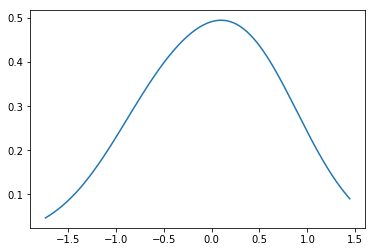

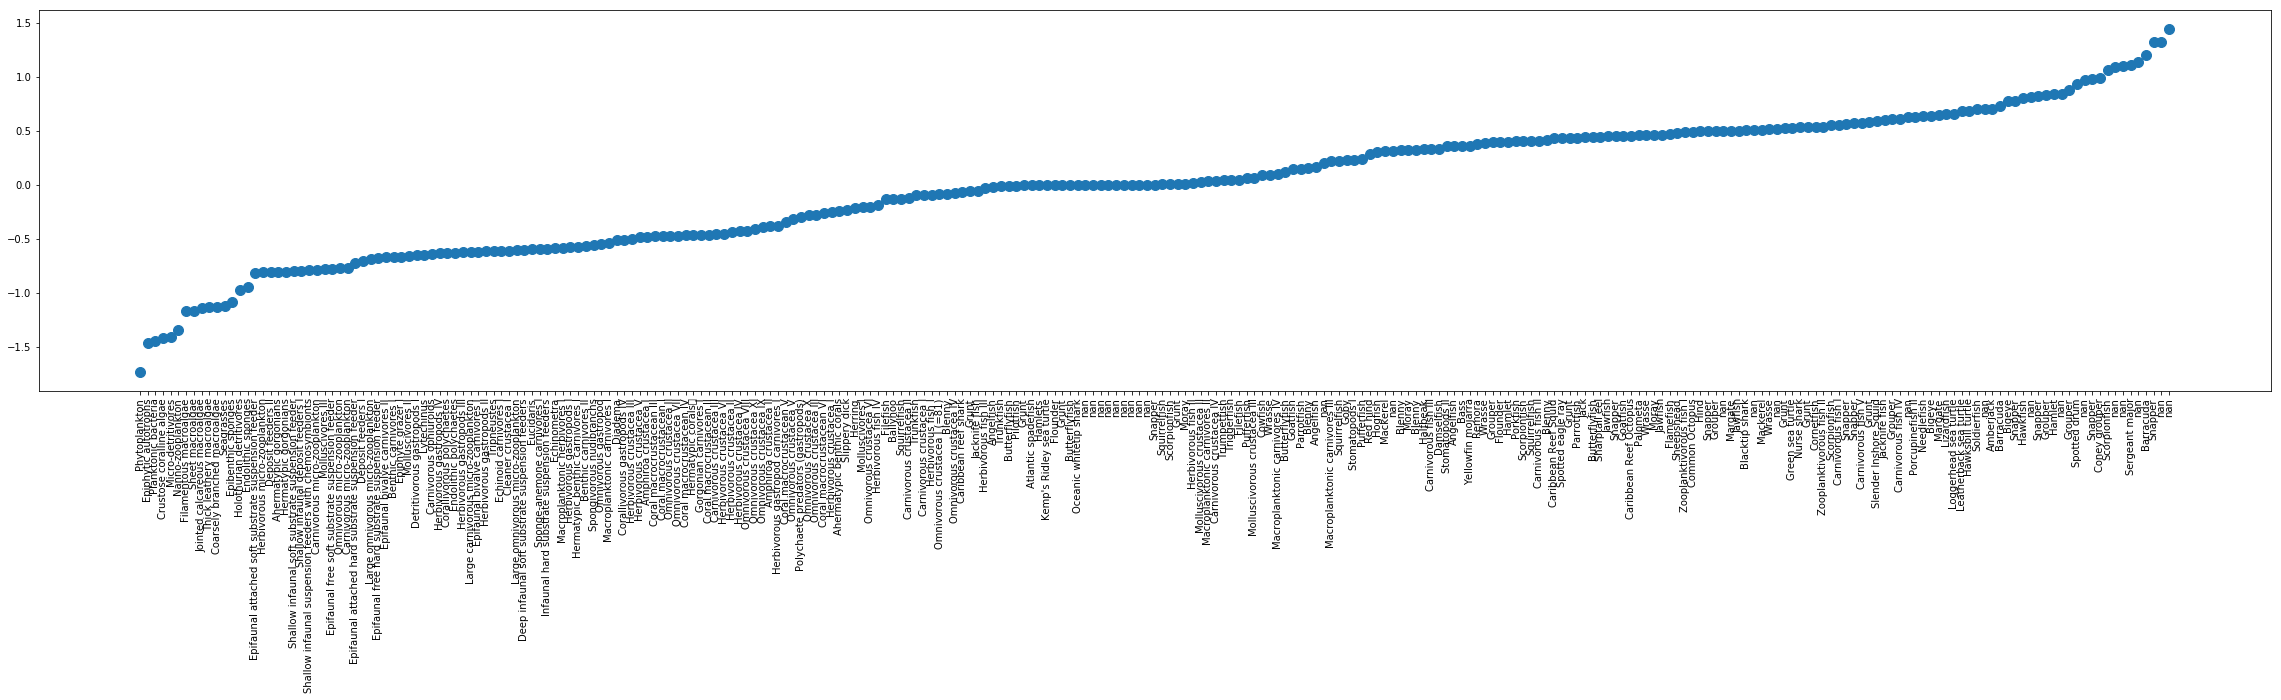

In [11]:
rank.plot(correlation = correlation, scores = scores, labels = Meta_data['Guild Description'].values, figsize=(40,7))

Communities?
---------



In [12]:
clusters_scores, clusters_correlation = rank.community(A, n_clusters=3)
cluster_par = rank.community(A, n_clusters=3, c_type='parallel')

Generating null model ...
Finding clusters ...
Done


Looking at the communities
------

In [13]:
d = {"Guild Number": np.arange(1,266), "cluster_scr": clusters_scores, "cluster_cor": clusters_correlation, "cluster_par": cluster_par, "ranks": scores}
SR_data = pd.DataFrame(data=d)
Cayman = SR_data.merge(Meta_data.dropna(), on="Guild Number", how="inner", suffixes=("_sr","_meta"))
Cayman.head(10)

,Guild Number,cluster_cor,cluster_par,cluster_scr,ranks,Guild Description,Foraging Habitat,Number of Prey,Prey
0,1,1,2,1,-1.449378,Planktonic bacteria,.,0.0,.
1,2,0,1,1,-1.734984,Phytoplankton,.,0.0,.
2,3,0,1,1,-1.348871,Nanno-zooplankton,.,30.0,"1, 2"
3,5,1,2,1,-1.165852,Sheet macroalgae,.,0.0,.
4,6,1,2,1,-1.132369,Coarsely branched macroalgae,.,0.0,.
5,7,1,2,1,-1.144088,Jointed calcareous macroalgae,.,0.0,.
6,8,0,2,1,-1.132797,Thick leathery macroalgae,.,0.0,.
7,9,1,2,1,-1.418534,Crustose coralline algae,.,0.0,.
8,10,0,2,1,-1.123664,Seagrasses,.,0.0,.
9,11,0,1,1,-1.086887,Epibenthic sponges,.,30.0,"1, 2"


Note: Nodes are ordered by scores (increasing) in orrelation matrix


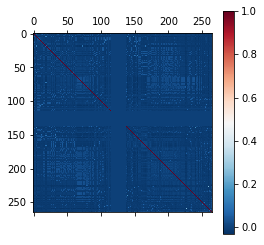

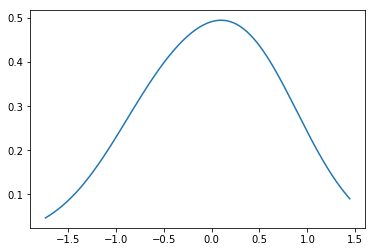

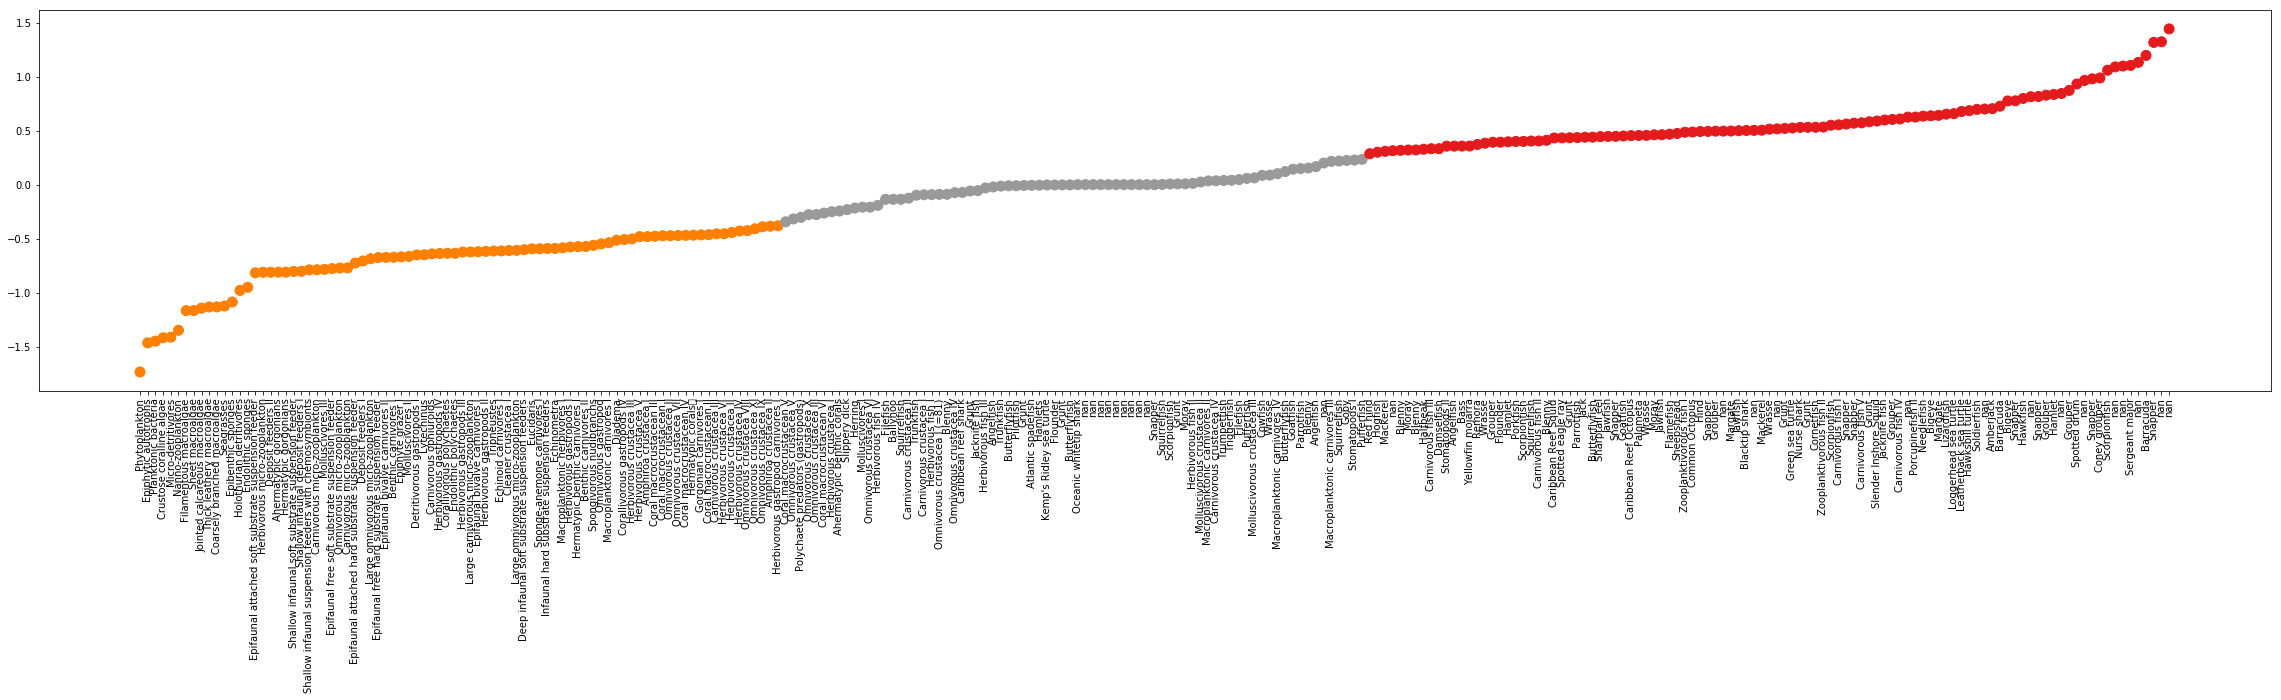

In [14]:
rank.plot(correlation = correlation, scores = scores, labels = Meta_data['Guild Description'].values, community=clusters_scores, figsize=(40,7))

Note: Nodes are ordered by scores (increasing) in orrelation matrix


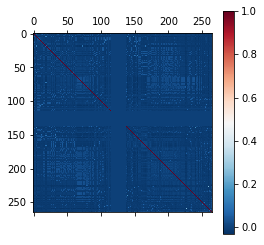

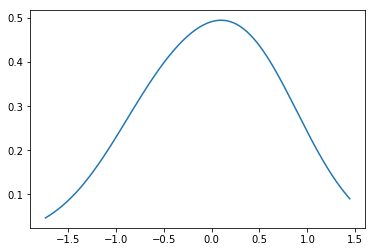

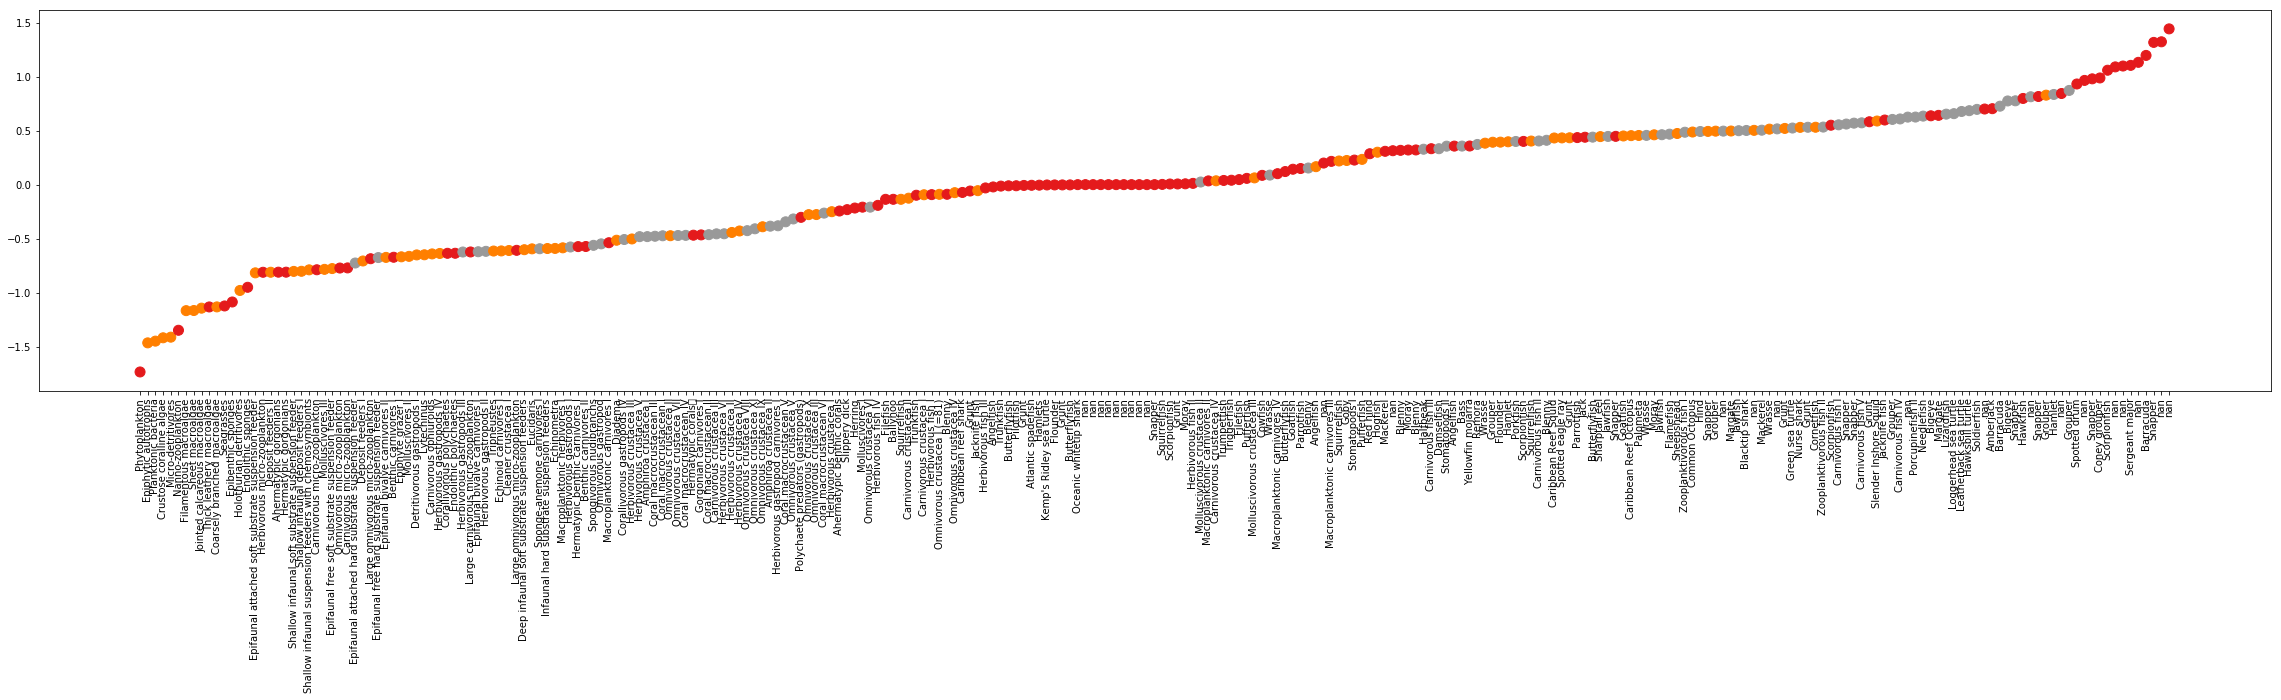

In [15]:
rank.plot(correlation = correlation, scores = scores, labels = Meta_data['Guild Description'].values, community=clusters_correlation, figsize=(40,7))

Note: Nodes are ordered by scores (increasing) in orrelation matrix


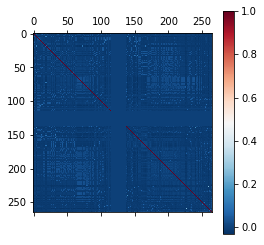

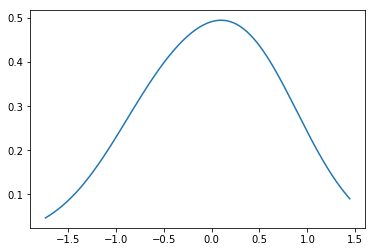

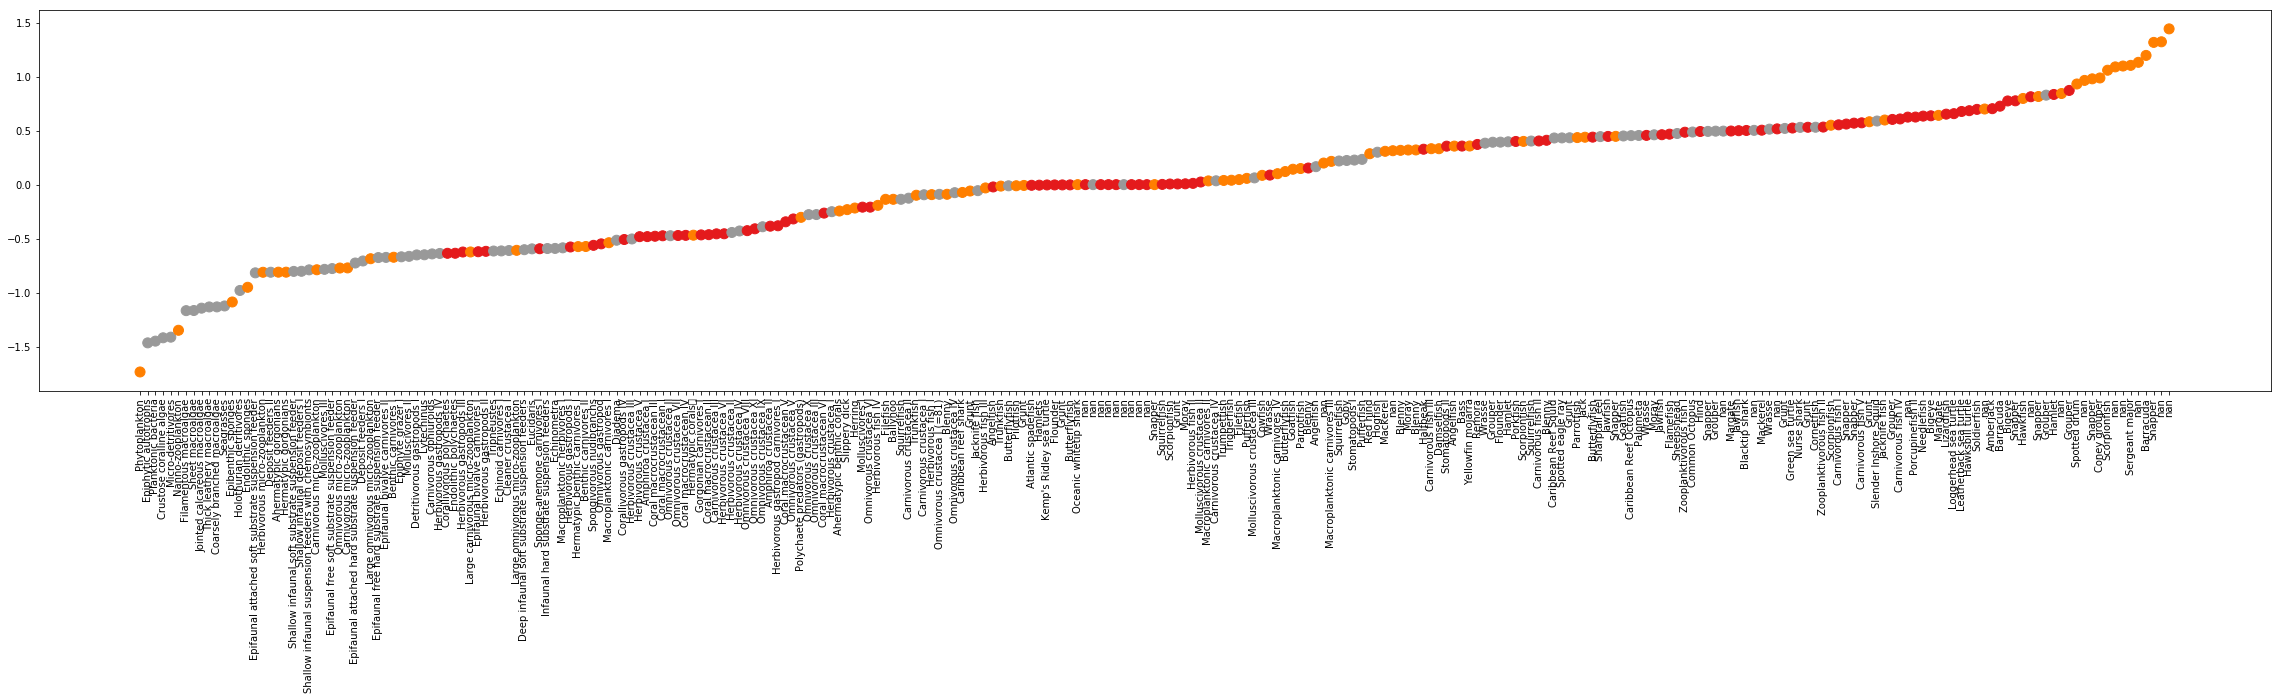

In [17]:
rank.plot(correlation = correlation, scores = scores, labels = Meta_data['Guild Description'].values, community=cluster_par, figsize=(40,7))

In [18]:
Cayman.dtypes

Guild Number          object
cluster_cor            int32
cluster_par            int32
cluster_scr            int32
ranks                float64
Guild Description     object
Foraging Habitat      object
Number of Prey       float64
Prey                  object
dtype: object

In [19]:
Cayman['cluster_scr'] = Cayman['cluster_scr'].astype(object)
Cayman['cluster_cor'] = Cayman['cluster_cor'].astype(object)
Cayman['cluster_par'] = Cayman['cluster_par'].astype(object)
Cayman.dtypes

Guild Number          object
cluster_cor           object
cluster_par           object
cluster_scr           object
ranks                float64
Guild Description     object
Foraging Habitat      object
Number of Prey       float64
Prey                  object
dtype: object

In [20]:
Cayman_by_scr = Cayman.groupby('cluster_scr')
Cayman_by_scr['Foraging Habitat'].value_counts()
#Clusters by scores don't correlate with foraging habitat

cluster_scr  Foraging Habitat
0            r                   57
             rg                  28
             g                   15
1            .                   83
2            .                   20
             r                   16
             rg                  13
             g                    8
Name: Foraging Habitat, dtype: int64

In [22]:
Cayman_by_cor = Cayman.groupby('cluster_cor')
Cayman_by_cor['Foraging Habitat'].value_counts()
#Cluster by correlation don't correlate with foraging habitat either

,count,unique,top,freq
cluster_cor,,,,
0,92,4,r,38
1,78,3,.,46
2,70,3,r,35


In [24]:
Cayman_by_par = Cayman.groupby('cluster_par')
Cayman_by_par['Foraging Habitat'].describe()
#Cluster by correlation with null model don't correlate with foraging habitat either

,count,unique,top,freq
cluster_par,,,,
0,77,4,r,35
1,79,4,r,37
2,84,4,.,50


In [25]:
pd.options.display.max_colwidth = 2000
pd.DataFrame(Cayman_by_scr['Guild Description'].unique().apply(lambda x: ', '.join(x)))

,Guild Description
cluster_scr,
0,"Triggerfish, Butterflyfish, Pufferfish, Slippery dick, Squirrelfish, Grunt, Sharptail eel, Wrasse, Nurse shark, Slender Inshore Squid, Caribbean Reef Squid, Hogfish, Porcupinefish II, Blenny, Remora, Snapper, Jacknife fish, Porkfish, Spotted drum, Soldierfish, Hawkfish, Carnivorous fish I, Jawfish, Flamefish, Carnivorous fish II, Bass, Moray, Yellowfin mojarra, Carnivorous fish III, Carnivorous fish IV, Carnivorous fish V, Goatfish, Scorpionfish, Spotted eagle ray, Sheepshead, Halfbeak, Palometa, Cornetfish, Margate, Grouper, Trumpetfish, Red hind, Flounder, Bigeye, Hamlet, Coney grouper, Hamlets, Sergeant major, Hind, Jack, Amberjack, Lizardfish, Loggerhead sea turtle, Needlefish, Mackerel, Barracuda, Blacktip shark, Caribbean reef shark"
1,"Planktonic bacteria, Phytoplankton, Nanno-zooplankton, Sheet macroalgae, Coarsely branched macroalgae, Jointed calcareous macroalgae, Thick leathery macroalgae, Crustose coralline algae, Seagrasses, Epibenthic sponges, Endolithic sponges, Hermatypic corals, Micro-detritivores, Corallivorous polychaetes, Herbivorous micro-zooplankton, Omnivorous micro-zooplankton, Carnivorous micro-zooplankton, Macroplanktonic carnivores I, Large omnivorous micro-zooplankton, Large carnivorous micro-zooplankton, Epiphytic autotrophs, Hermatypic gorgonians, Ahermatypic gorgonians, Benthic carnivores I, Hermatypic benthic carnivores I, Diadema, Tripneustes, Eucidaris, Echinometra, Lytechinus, Deposit feeders I, Macroplanktonic herbivores I, Shallow infaunal deposit feeders I, Deep infaunal soft substrate suspension feeders, Shallow infaunal suspension feeders with chemosymbionts, Shallow infaunal soft substrate suspension feeder, Epifaunal attached hard substrate suspension feeder, Epifaunal attached soft substrate suspension feeder, Epifaunal free hard substrate suspension feeder, Infaunal hard substrate suspension feeders, Epifaunal free soft substrate suspension feeder, Spongivorous nudibranchs, Omnivorous gastropod, Herbivorous gastropods I, Herbivorous gastropods II, Herbivorous gastropods III, Herbivorous gastropods IV, Corallivorous gastropods IV, Gorgonian carnivores I, Echinoid carnivores I, Epifaunal bivalve carnivores I, Sponge-anemone carnivores I, Herbivorous gastropod carnivores I, Epifaunal bivalve carnivores II, Detritivorous gastropods I, Molluscivores II, Molluscivores III, Epiphyte grazer I, Benthic carnivores II, Deposit feeders II, Endolithic polychaetes, Holothurian detritivores, Coral macrocrustacean I, Coral macrocrustacean II, Coral macrocrustacean III, Coral macrocrustacean IV, Carnivorous ophiuroids, Cleaner crustacea I, Herbivorous crustacea II, Herbivorous crustacea III, Omnivorous crustacea II, Herbivorous crustacea IV, Herbivorous crustacea V, Herbiv..."
2,"Ahermatypic benthic corals, Macroplanktonic carnivores II, Macroplanktonic carnivores III, Macroplanktonic carnivores IV, Molluscivores I, Coral macrocrustacean V, Polychaete predators (gastropods), Molluscivorous crustacea II, Coral macrocrustacean VI, Herbivorous crustacea I, Omnivorous crustacea I (=81), Omnivorous crustacea III, Molluscivorous crustacea III, Carnivorous crustacea I, Carnivorous crustacea II, Omnivorous crustacea IV, Omnivorous crustacea V, Omnivorous crustacea VI, Omnivorous crustacea X, Carnivorous crustacea IV, Herbivorous fish I, Herbivorous fish II, Herbivorous fish III, Herbivorous fish IV, Filefish, Cowfish, Angelfish, Atlantic spadefish, Parrotfish, Damselfish, Blenny, Trunkfish, Herring, Pilotfish, Pufferfish, Goby, Stomatopods I, Caribbean Reef Octopus, Common Octopus, Stomatopods II, Zooplanktivorous fish I, Zooplanktivorous fish II, Grunt, Ballyhoo, Mackerel, Green sea turtle, Hawksbill turtle, Kemp's Ridley sea turtle, Leatherback sea turtle, Oceanic whitetip shark"


In [26]:
pd.DataFrame(Cayman_by_cor['Guild Description'].unique().apply(lambda x: ', '.join(x)))

,Guild Description
cluster_cor,
0,"Phytoplankton, Nanno-zooplankton, Thick leathery macroalgae, Seagrasses, Epibenthic sponges, Endolithic sponges, Ahermatypic benthic corals, Hermatypic corals, Corallivorous polychaetes, Herbivorous micro-zooplankton, Omnivorous micro-zooplankton, Carnivorous micro-zooplankton, Macroplanktonic carnivores I, Large omnivorous micro-zooplankton, Large carnivorous micro-zooplankton, Macroplanktonic carnivores II, Macroplanktonic carnivores III, Macroplanktonic carnivores IV, Hermatypic gorgonians, Ahermatypic gorgonians, Benthic carnivores I, Hermatypic benthic carnivores I, Gorgonian carnivores I, Molluscivores I, Benthic carnivores II, Endolithic polychaetes, Polychaete predators (gastropods), Herbivorous fish I, Herbivorous fish II, Herbivorous fish III, Herbivorous fish IV, Filefish, Angelfish, Atlantic spadefish, Parrotfish, Butterflyfish, Damselfish, Blenny, Herring, Pilotfish, Pufferfish, Goby, Caribbean Reef Squid, Snapper, Zooplanktivorous fish I, Carnivorous fish I, Jawfish, Zooplanktivorous fish II, Grunt, Ballyhoo, Halfbeak, Palometa, Cornetfish, Scorpionfish, Grouper, Moray, Trumpetfish, Flounder, Jacknife fish, Sergeant major, Jack, Amberjack, Lizardfish, Mackerel, Green sea turtle, Hawksbill turtle, Loggerhead sea turtle, Kemp's Ridley sea turtle, Leatherback sea turtle, Needlefish, Barracuda, Blacktip shark, Oceanic whitetip shark, Caribbean reef shark"
1,"Planktonic bacteria, Sheet macroalgae, Coarsely branched macroalgae, Jointed calcareous macroalgae, Crustose coralline algae, Micro-detritivores, Epiphytic autotrophs, Diadema, Tripneustes, Eucidaris, Echinometra, Lytechinus, Deposit feeders I, Macroplanktonic herbivores I, Shallow infaunal deposit feeders I, Deep infaunal soft substrate suspension feeders, Shallow infaunal suspension feeders with chemosymbionts, Shallow infaunal soft substrate suspension feeder, Epifaunal attached soft substrate suspension feeder, Infaunal hard substrate suspension feeders, Epifaunal free soft substrate suspension feeder, Herbivorous gastropods IV, Echinoid carnivores I, Epifaunal bivalve carnivores II, Detritivorous gastropods I, Molluscivores II, Molluscivores III, Epiphyte grazer I, Deposit feeders II, Holothurian detritivores, Carnivorous ophiuroids, Cleaner crustacea I, Herbivorous crustacea I, Herbivorous crustacea II, Herbivorous crustacea III, Omnivorous crustacea I (=81), Omnivorous crustacea II, Omnivorous crustacea III, Molluscivorous crustacea III, Carnivorous crustacea I, Carnivorous crustacea II, Omnivorous crustacea IV, Herbivorous crustacea IV, Omnivorous crustacea IX, Omnivorous crustacea X, Carnivorous crustacea IV, Cowfish, Trunkfish, Pufferfish, Filefish, Slippery dick, Stomatopods I, Squirrelfish, Grunt, Sharptail eel, Wrasse, Common Octopus, Carnivorous fish III, Carnivorous fish IV, Carnivorous fish V, Goatfish, Scorpionfish, Spotted eagle ray, Sheepshead, Margate, Snapper"
2,"Epifaunal attached hard substrate suspension feeder, Epifaunal free hard substrate suspension feeder, Spongivorous nudibranchs, Omnivorous gastropod, Herbivorous gastropods I, Herbivorous gastropods II, Herbivorous gastropods III, Corallivorous gastropods IV, Epifaunal bivalve carnivores I, Sponge-anemone carnivores I, Herbivorous gastropod carnivores I, Coral macrocrustacean I, Coral macrocrustacean II, Coral macrocrustacean III, Coral macrocrustacean IV, Coral macrocrustacean V, Molluscivorous crustacea II, Coral macrocrustacean VI, Herbivorous crustacea V, Herbivorous crustacea VI, Omnivorous crustacea V, Carnivorous crustacea III, Omnivorous crustacea VI, Amphiroa crustacea I, Amphiroa crustacea II, Omnivorous crustacea VII, Omnivorous crustacea VIII, Omnivorous crustacea XI, Triggerfish, Wrasse, Nurse shark, Caribbean Reef Octopus, Slender Inshore Squid, Hogfish, Stomatopods II, Porcupinefish II, Blenny, Remora, Jacknife fish, Porkfish, Spotted drum, Soldierfish, Hawkfish, Flamefish, Carnivorous fish II, Bass, Jawfish, Moray, Yellowfin mojarra

In [27]:
pd.DataFrame(Cayman_by_par['Guild Description'].unique().apply(lambda x: ', '.join(x)))

,Guild Description
cluster_par,
0,"Corallivorous polychaetes, Spongivorous nudibranchs, Omnivorous gastropod, Herbivorous gastropods I, Herbivorous gastropods II, Herbivorous gastropods III, Corallivorous gastropods IV, Gorgonian carnivores I, Epifaunal bivalve carnivores I, Sponge-anemone carnivores I, Herbivorous gastropod carnivores I, Molluscivores I, Endolithic polychaetes, Coral macrocrustacean I, Coral macrocrustacean II, Coral macrocrustacean III, Coral macrocrustacean IV, Coral macrocrustacean V, Molluscivorous crustacea II, Coral macrocrustacean VI, Herbivorous crustacea V, Herbivorous crustacea VI, Omnivorous crustacea V, Carnivorous crustacea III, Omnivorous crustacea VI, Amphiroa crustacea I, Amphiroa crustacea II, Omnivorous crustacea VII, Omnivorous crustacea VIII, Omnivorous crustacea XI, Wrasse, Nurse shark, Caribbean Reef Octopus, Slender Inshore Squid, Hogfish, Stomatopods II, Porcupinefish II, Blenny, Remora, Jacknife fish, Porkfish, Spotted drum, Soldierfish, Hawkfish, Flamefish, Carnivorous fish II, Bass, Jawfish, Moray, Yellowfin mojarra, Grunt, Palometa, Snapper, Trumpetfish, Red hind, Scorpionfish, Bigeye, Hamlet, Flounder, Coney grouper, Hamlets, Hind, Kemp's Ridley sea turtle, Leatherback sea turtle, Oceanic whitetip shark, Grouper"
1,"Phytoplankton, Nanno-zooplankton, Epibenthic sponges, Endolithic sponges, Ahermatypic benthic corals, Hermatypic corals, Herbivorous micro-zooplankton, Omnivorous micro-zooplankton, Carnivorous micro-zooplankton, Macroplanktonic carnivores I, Large omnivorous micro-zooplankton, Large carnivorous micro-zooplankton, Macroplanktonic carnivores II, Macroplanktonic carnivores III, Macroplanktonic carnivores IV, Hermatypic gorgonians, Ahermatypic gorgonians, Benthic carnivores I, Hermatypic benthic carnivores I, Benthic carnivores II, Polychaete predators (gastropods), Herbivorous fish I, Herbivorous fish II, Herbivorous fish III, Herbivorous fish IV, Filefish, Angelfish, Atlantic spadefish, Triggerfish, Parrotfish, Butterflyfish, Damselfish, Blenny, Herring, Pilotfish, Goby, Caribbean Reef Squid, Snapper, Zooplanktivorous fish I, Carnivorous fish I, Jawfish, Zooplanktivorous fish II, Ballyhoo, Halfbeak, Cornetfish, Scorpionfish, Grouper, Moray, Flounder, Jacknife fish, Sergeant major, Jack, Amberjack, Lizardfish, Mackerel, Green sea turtle, Hawksbill turtle, Loggerhead sea turtle, Needlefish, Barracuda, Blacktip shark, Caribbean reef shark"
2,"Planktonic bacteria, Sheet macroalgae, Coarsely branched macroalgae, Jointed calcareous macroalgae, Thick leathery macroalgae, Crustose coralline algae, Seagrasses, Micro-detritivores, Epiphytic autotrophs, Diadema, Tripneustes, Eucidaris, Echinometra, Lytechinus, Deposit feeders I, Macroplanktonic herbivores I, Shallow infaunal deposit feeders I, Deep infaunal soft substrate suspension feeders, Shallow infaunal suspension feeders with chemosymbionts, Shallow infaunal soft substrate suspension feeder, Epifaunal attached hard substrate suspension feeder, Epifaunal attached soft substrate suspension feeder, Epifaunal free hard substrate suspension feeder, Infaunal hard substrate suspension feeders, Epifaunal free soft substrate suspension feeder, Herbivorous gastropods IV, Echinoid carnivores I, Epifaunal bivalve carnivores II, Detritivorous gastropods I, Molluscivores II, Molluscivores III, Epiphyte grazer I, Deposit feeders II, Holothurian detritivores, Carnivorous ophiuroids, Cleaner crustacea I, Herbivorous crustacea I, Herbivorous crustacea II, Herbivorous crustacea III, Omnivorous crustacea I (=81), Omnivorous crustacea II, Omnivorous crustacea III, Molluscivorous crustacea III, Carnivorous crustacea I, Carnivorous crustacea II, Omnivorous crustacea IV, Herbivorous crustacea IV, Omnivorous crustacea IX, Omnivorous crustacea X, Carnivorous crustacea IV, Cowfish, Angelfish, Trunkfish, Pufferfish, Filefish, Slippery dick, Stomatopods I, Squirrelfish, Grunt, Sharptail eel, Wrasse, Common Octopus, Carnivorous fish III, Carnivorous fis

Save network for viz in Gephi
---------------

edges.csv

- Target: id of nodes
- Source: id of nodes
- All edges have weight 1

nodes.csv

- id: guild numbers
- cluster1: community given by SR scores
- cluster2: community given by SR correlations
- ranks: scores given by SR
- description: guild description in common language
- habitat: foraging habitat
- prey_number: number of guilds containing preys
- preys: list of preys


In [62]:
#Create edges.csv file
#Find the indices of non-zero elements in adjacency matrix

cols = Data.columns
bt = Data.apply(lambda x: x > 0) #return T, F data frame
temp = bt.apply(lambda x: list(cols[x.values]), axis=1) #return lists of targets 
l = 3766 #number of edges
Source = np.zeros(l)
Target = np.zeros(l)
current_index = 0
for i in range(0,265):
    new_index = current_index + len(temp[i])
    Target[current_index: new_index] = temp[i]
    Source[current_index: new_index] = i
    current_index = new_index
Target = Target+1.0
Source = Source+1.0

#Note: would have been easier to do this after importing .dat file as numpy matrix

In [71]:
#Save the edges in csv file
np.savetxt('cayman_edges.csv', np.dstack((Source, Target))[0], delimiter=',', header=("Source, Target"))

In [187]:
#Create nodes.csv file

d = {"Guild Number": np.arange(1,266), "cluster_scr": clusters0, "cluster_cor": clusters1, "cluster_par": cluster_par, "ranks": scores}
SR_data = pd.DataFrame(data=d)
Nodes_data = SR_data.merge(Meta_data.dropna(), on="Guild Number", how="inner", suffixes=("_sr","_meta"))
Nodes_data.head(10)

,Guild Number,cluster1,cluster2,ranks,Guild Description,Foraging Habitat,Number of Prey,Prey
0,1,2,0,-1.734984,Planktonic bacteria,.,0.0,.
1,2,2,2,-1.465477,Phytoplankton,.,0.0,.
2,3,2,1,-1.449378,Nanno-zooplankton,.,30.0,"1, 2"
3,5,2,1,-1.412683,Sheet macroalgae,.,0.0,.
4,6,2,0,-1.348871,Coarsely branched macroalgae,.,0.0,.
5,7,2,1,-1.167036,Jointed calcareous macroalgae,.,0.0,.
6,8,2,0,-1.165852,Thick leathery macroalgae,.,0.0,.
7,9,2,2,-1.144088,Crustose coralline algae,.,0.0,.
8,10,2,0,-1.132797,Seagrasses,.,0.0,.
9,11,2,2,-1.132369,Epibenthic sponges,.,30.0,"1, 2"


In [189]:
#Merge with nodes.csv from Gephi

Gephi_data = pd.read_csv('..\\data\\foodweb\\Coral reef\\gephi_cayman_nodes.csv')
Nodes_data1 = Nodes_data.merge(Gephi_data, on="Guild Number", how="right", suffixes=("_l", "_r"))
# Nodes_data1 = Nodes_data1.drop(["Guild Number_l", "Guild Number_r"], axis=1)
Nodes_data1.head(10)

,Guild Number,cluster1,cluster2,ranks,Guild Description,Foraging Habitat,Number of Prey,Prey
0,1.0,2.0,0.0,-1.734984,Planktonic bacteria,.,0.0,.
1,2.0,2.0,2.0,-1.465477,Phytoplankton,.,0.0,.
2,3.0,2.0,1.0,-1.449378,Nanno-zooplankton,.,30.0,"1, 2"
3,5.0,2.0,1.0,-1.412683,Sheet macroalgae,.,0.0,.
4,6.0,2.0,0.0,-1.348871,Coarsely branched macroalgae,.,0.0,.
5,7.0,2.0,1.0,-1.167036,Jointed calcareous macroalgae,.,0.0,.
6,8.0,2.0,0.0,-1.165852,Thick leathery macroalgae,.,0.0,.
7,9.0,2.0,2.0,-1.144088,Crustose coralline algae,.,0.0,.
8,10.0,2.0,0.0,-1.132797,Seagrasses,.,0.0,.
9,11.0,2.0,2.0,-1.132369,Epibenthic sponges,.,30.0,"1, 2"
